In [1]:
#@title Import packages
import numpy as np, pandas as pd
from matplotlib import pylab
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # 恢复matplotlib默认样式
import seaborn as sns

# plt.style.use('ggplot')
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
import warnings
warnings.filterwarnings('ignore')

#The Python Graph Gallery: https://www.python-graph-gallery.com/

# Part 1 Matplotlib Package

## 1.1 Comparison between stateful and stateless approach

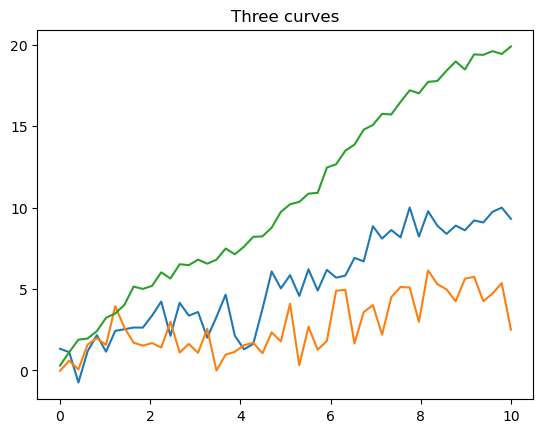

In [2]:
## Comparison between stateful and stateless approach
x=np.linspace(0,10,50)
np.random.seed(10)
# stateful
plt.plot(x,np.sin(x)+x+np.random.randn(50)) # randn: standard normal distrubtion
plt.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
plt.plot(x,np.sin(x)+2*x+np.random.rand(50))
plt.title("Three curves")

plt.show()

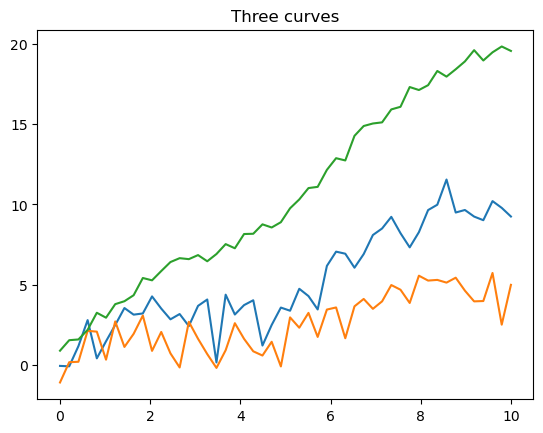

In [3]:
# stateless
fig,ax0=plt.subplots(nrows=1) # Create a figure and a set of subplots.if multiple plots, return an array to ax. 
ax0.plot(x,np.sin(x)+x+np.random.randn(50)) # randn: return standard normal distribution
ax0.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
ax0.plot(x,np.sin(x)+2*x+np.random.rand(50))
ax0.set_title("Three curves")
plt.show()

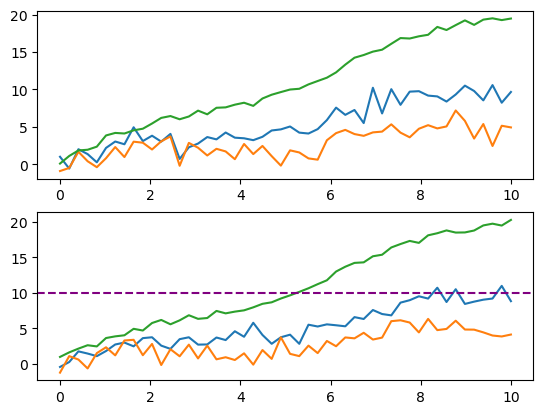

In [4]:
## Plot multiple charts on the same figure: stateless only
fig=plt.figure() # create a new figure
ax0=fig.add_subplot(211) # figure layout: 2x1. We will plot the first chart on [0,0]
ax0.plot(x,np.sin(x)+x+np.random.randn(50))
ax0.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
ax0.plot(x,np.sin(x)+2*x+np.random.rand(50))

ax1=fig.add_subplot(212)
ax1.plot(x,np.sin(x)+x+np.random.randn(50))
ax1.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
ax1.plot(x,np.sin(x)+2*x+np.random.rand(50))
plt.axhline(y=10,color='purple',linestyle='--')

plt.show()

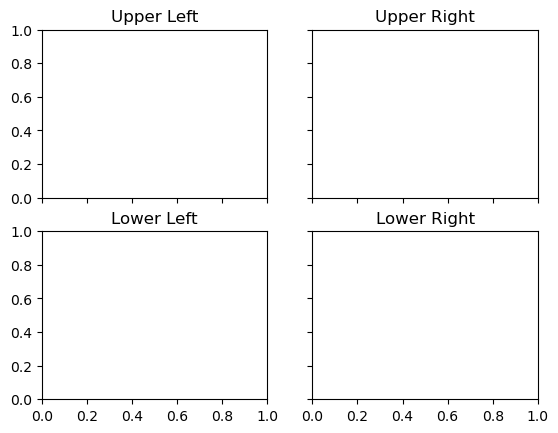

In [5]:
#Another example for multiple subplots and shared axes
fig,axes = plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')
plt.show()

## 1.2 Adjust coordinate objects

adjust background color
adjust gridline
set x-axis label and y-axis label
adjust x-axis and y-axis ticks

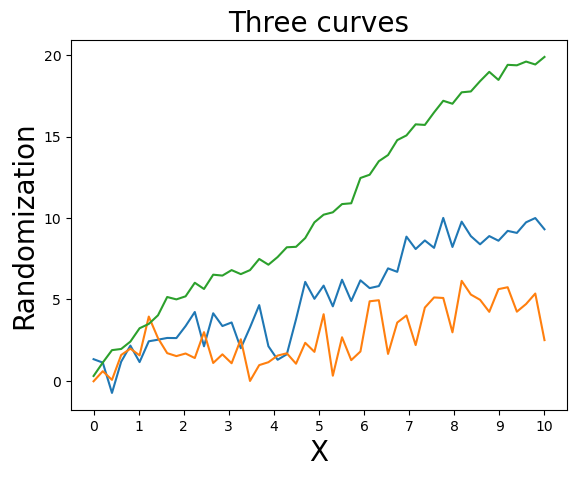

In [6]:
x=np.linspace(0,10,50)
np.random.seed(10)
fig,ax0=plt.subplots(nrows=1)
ax0.plot(x,np.sin(x)+x+np.random.randn(50))
ax0.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
ax0.plot(x,np.sin(x)+2*x+np.random.rand(50))
ax0.set_title("Three curves",fontsize=20)

# 1. adjust gridline type: dotted-line
ax0.grid(color='gray', alpha=0.5, linestyle='dotted') # alpha to adjust grid transparency
# or hide the grid: 
ax0.grid(False)
# 2. set x-axis label and y-axis label
ax0.set_xlabel('X')
ax0.set_ylabel('Randomization')
ax0.xaxis.label.set_size(20) # set xlabel size
ax0.yaxis.label.set_size(20) # set xlabel size
# # 3. adjust x-axis and y-axis data range
ax0.set_xticks(np.arange(min(x),max(x)+1,1)) # list of locations
# sns.despine(ax=ax0,left=True,bottom=True) # remove the left and bottom frame 
plt.show() # used to suppress 

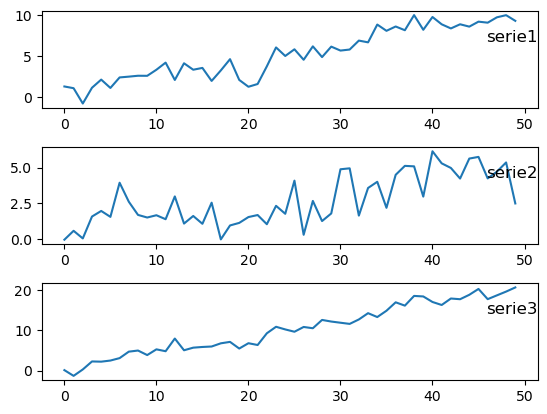

In [7]:
## 用for loop to subplot
x=np.linspace(0,10)
np.random.seed(10)
# 生成数据
y1=np.sin(x)+x+np.random.randn(50)
y2=np.sin(x)+0.5*x+np.random.randn(50)
y3=np.sin(x)+2*x+np.random.randn(50)

df=pd.DataFrame({'serie1':y1,'serie2':y2,'serie3':y3})

fig=plt.figure()
fig.subplots_adjust(hspace=0.4)

i=1
for col in df.columns:
    plt.subplot(df.shape[1],1,i) 
    plt.plot(df.loc[:,col])
    plt.title(col,y=0.6,loc='right')
    i+=1
fig.show()
plt.show()

## 1.3 Visualization case with Matplotlib

In [8]:
# Import data using Pandas. csv file is in a Google Drive
file_id='1pCAvWHSnsMahqrdS9DndTBjbVuvjglXK' #Changed
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
df = pd.read_csv(csv_url)
df.head()

Customer ID     Name  Surname  Gender  Age            Region  \
0    100000001    Simon    Walsh    Male   21           England   
1    400000002  Jasmine   Miller  Female   34  Northern Ireland   
2    100000003     Liam    Brown    Male   46           England   
3    300000004   Trevor     Parr    Male   32             Wales   
4    100000005  Deirdre  Pullman  Female   38           England   

  Job Classification Date Joined    Balance  
0       White Collar   05.Jan.15  113810.15  
1        Blue Collar   06.Jan.15   36919.73  
2       White Collar   07.Jan.15  101536.83  
3       White Collar   08.Jan.15    1421.52  
4        Blue Collar   09.Jan.15   35639.79

In [9]:
# Data preprocessing:  rename columns, create age group
df.columns=['cust_id','first_name','last_name','gender','age','region','job','date_join',
           'balance']
df['age_group'] = pd.cut(df['age'], bins=[15, 30, 50, float('Inf')], labels=['15-30', '30-50', 'Above 50'])


In [10]:
df.head()

cust_id first_name last_name  gender  age            region  \
0  100000001      Simon     Walsh    Male   21           England   
1  400000002    Jasmine    Miller  Female   34  Northern Ireland   
2  100000003       Liam     Brown    Male   46           England   
3  300000004     Trevor      Parr    Male   32             Wales   
4  100000005    Deirdre   Pullman  Female   38           England   

            job  date_join    balance age_group  
0  White Collar  05.Jan.15  113810.15     15-30  
1   Blue Collar  06.Jan.15   36919.73     30-50  
2  White Collar  07.Jan.15  101536.83     30-50  
3  White Collar  08.Jan.15    1421.52     30-50  
4   Blue Collar  09.Jan.15   35639.79     30-50

In [11]:
dt_region_mean_bal=df.groupby(['region'])['balance'].mean()
dt_region_mean_bal
dt_region_mean_bal = dt_region_mean_bal.reset_index()
dt_region_mean_bal

region       balance
0           England  39292.911996
1  Northern Ireland  39505.053981
2          Scotland  39511.326263
3             Wales  42390.056269

In [12]:
# Balance vs region: Barchart
dt_region_mean_bal=df.groupby(['region'])['balance'].mean()
dt_region_mean_bal = dt_region_mean_bal.reset_index() # why reset index?
dt_region_mean_bal['balance']=np.rint(dt_region_mean_bal['balance'])
dt_region_mean_bal


region  balance
0           England  39293.0
1  Northern Ireland  39505.0
2          Scotland  39511.0
3             Wales  42390.0

In [13]:
# what if we didn't reset index
dt_region_mean_bal=df.groupby(['region'])['balance'].mean()
dt_region_mean_bal

region
England             39292.911996
Northern Ireland    39505.053981
Scotland            39511.326263
Wales               42390.056269
Name: balance, dtype: float64

In [14]:
dt_region_mean_bal=df.groupby(['region'])['balance'].mean().reset_index()

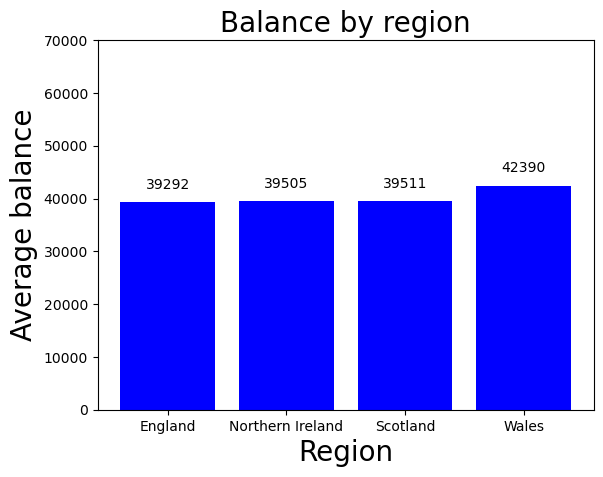

In [15]:
fig,ax0=plt.subplots(nrows=1)
ax0.bar(dt_region_mean_bal['region'],dt_region_mean_bal['balance'])
# adjust: xlabel, ylabel,y-axis scale; adjust background color
# add title
ax0.set_title("Balance by region",fontsize=20)
ax0.set_xlabel('Region')
ax0.set_ylabel('Average balance')
ax0.xaxis.label.set_size(20) # set xlabel size
ax0.yaxis.label.set_size(20) # set xlabel size
ax0.set_ylim(top=70000)
ax0.grid(False)

# what about data label?
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax0.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom') #ha=horizontal alignment

rect1=ax0.bar(dt_region_mean_bal['region'],dt_region_mean_bal['balance'],color='blue')
autolabel(rect1)
plt.show()

In [16]:
# Balance vs ( Region + Gender): Bar chart with multiple X
dt_rg_mean=df.groupby(['region','gender'])['balance'].mean()
dt_rg_mean=dt_rg_mean.reset_index()
dt_rg_mean['balance']=np.rint(dt_rg_mean['balance'])
dt_rg_mean

region  gender  balance
0           England  Female  39989.0
1           England    Male  38582.0
2  Northern Ireland  Female  38769.0
3  Northern Ireland    Male  41644.0
4          Scotland  Female  37306.0
5          Scotland    Male  40385.0
6             Wales  Female  40312.0
7             Wales    Male  44852.0

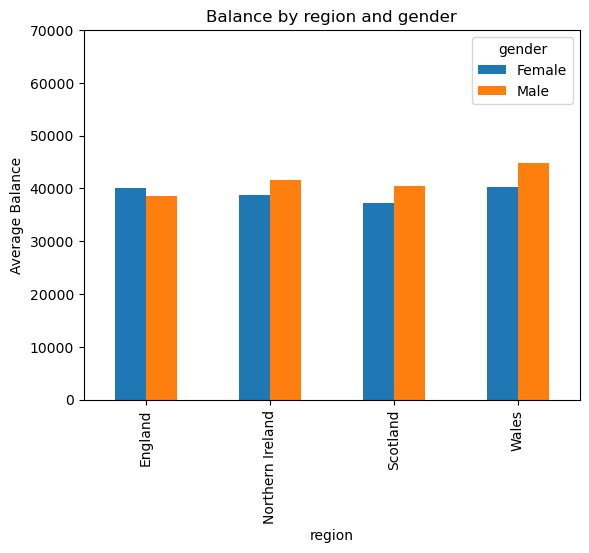

In [17]:
# use OOP + pandas plot
fig,ax1=plt.subplots(nrows=1)
df.groupby(['region','gender'])['balance'].mean().unstack().plot(kind='bar',ax=ax1)
ax1.set_ylim(top=70000)
ax1.set_title("Balance by region and gender")
ax1.set_ylabel('Average Balance')
ax1.grid(False)
plt.show()

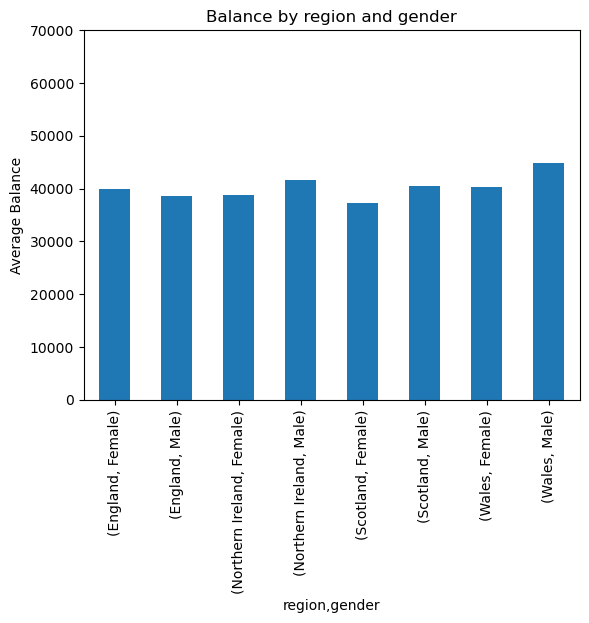

In [18]:
# without unstack()
fig,ax1=plt.subplots(nrows=1)
df.groupby(['region','gender'])['balance'].mean().plot(kind='bar',ax=ax1)
ax1.set_ylim(top=70000)
ax1.set_title("Balance by region and gender")
ax1.set_ylabel('Average Balance')
ax1.grid(False)
plt.show()

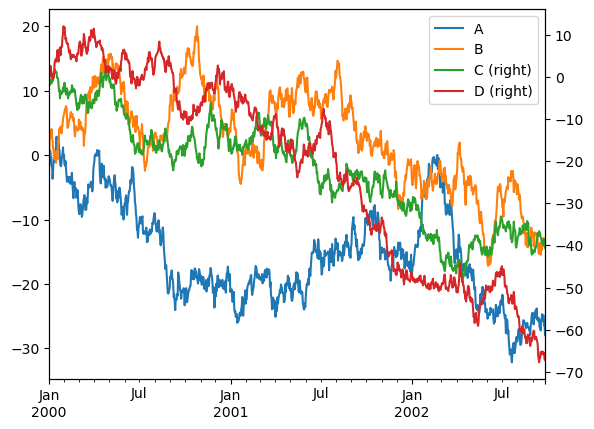

In [19]:
# two y-axies: example, plot conversions and conversion rate on the same chart.
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df_ts = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df_ts = df_ts.cumsum() # reduce the randomness of the data in order to show dummy trend
df_ts.plot(secondary_y=['C', 'D'], mark_right=True)
plt.show()

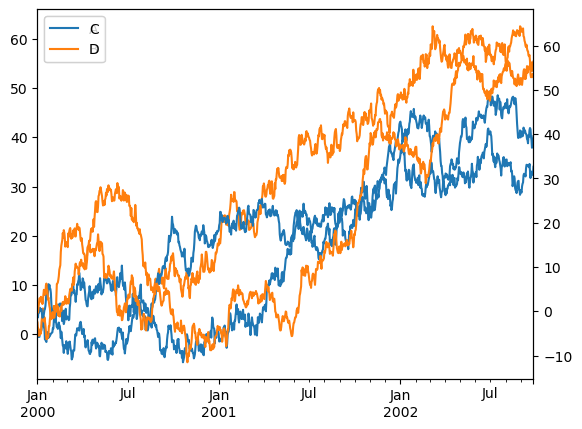

In [20]:
# Another way for dual y-axis
fig=plt.figure()
ax0=fig.add_subplot(111)
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df_ts1 = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df_ts1 = df_ts1.cumsum()
df_ts1.plot(use_index=True, y=['A','B'],ax=ax0)
ax1=ax0.twinx()
df_ts1.plot(use_index=True, y=['C','D'], ax=ax1) # You can then setup color and legend place respectively
plt.show()

# Part 2 Seaborn Package

## 2.1 Creating Chart in Seaborn

In [21]:
# Prepare the data
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df_iris=pd.read_csv(url) # a dataframes
df_iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

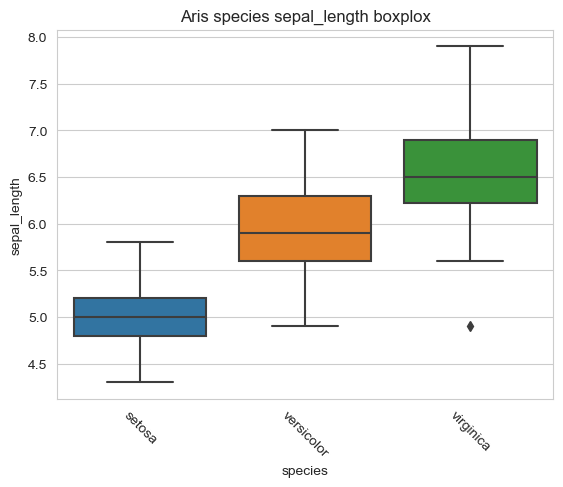

In [22]:
import seaborn as sns
sns.set_style('whitegrid')
#stateful
sns.boxplot(x='species',y='sepal_length',data=df_iris)
plt.xticks(rotation=-45) # adjust xticks
plt.title('Aris species sepal_length boxplox') # add title
plt.show()

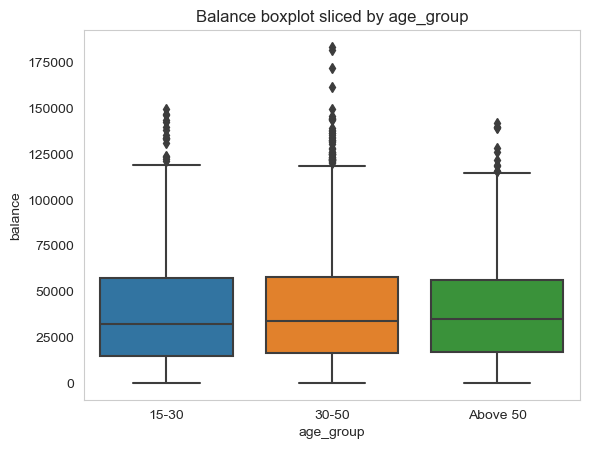

In [23]:
# boxplot UK bank client balance by age group, using seaborn and matplotlib
# stateless(OOP)
fig,ax2=plt.subplots(nrows=1)
sns.boxplot(x='age_group',y='balance',data=df,ax=ax2) # connect sns and matplotlib
ax2.grid(False)
ax2.set_title("Balance boxplot sliced by age_group")
plt.show()



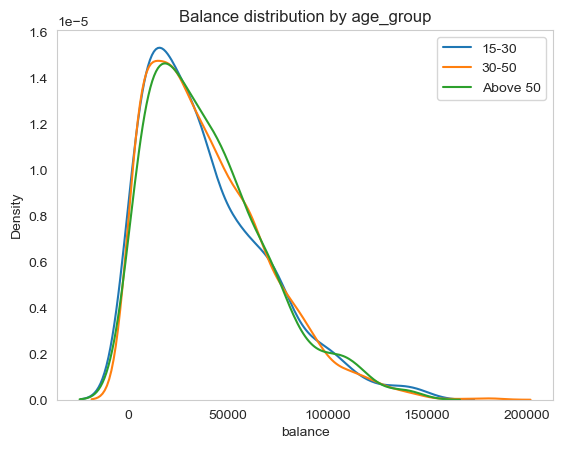

In [24]:
# Balance distribution by difference groups
# stateless(OOP)
fig = plt.figure()
ax3 = fig.add_subplot(1,1,1)

sns.distplot(df.loc[df['age_group']=='15-30','balance'],label='15-30', hist=False,ax=ax3)
sns.distplot(df.loc[df['age_group']=='30-50','balance'],label='30-50', hist=False,ax=ax3)
sns.distplot(df.loc[df['age_group']=='Above 50','balance'],label='Above 50', hist=False,ax=ax3)

ax3.grid(False)
ax3.set_title("Balance distribution by age_group")
ax3.legend()
plt.show()


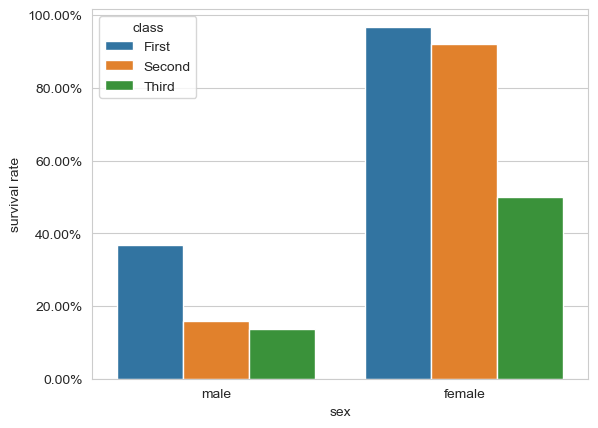

In [25]:
# barplot: return as object
df_titanic=sns.load_dataset('titanic')
g=sns.barplot(x="sex", y="survived", hue="class", ci=None,data=df_titanic)
g.set_ylabel('survival rate')
vals=g.get_yticks()
g.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]) # if you want to show percentage for yticklabels
plt.show()


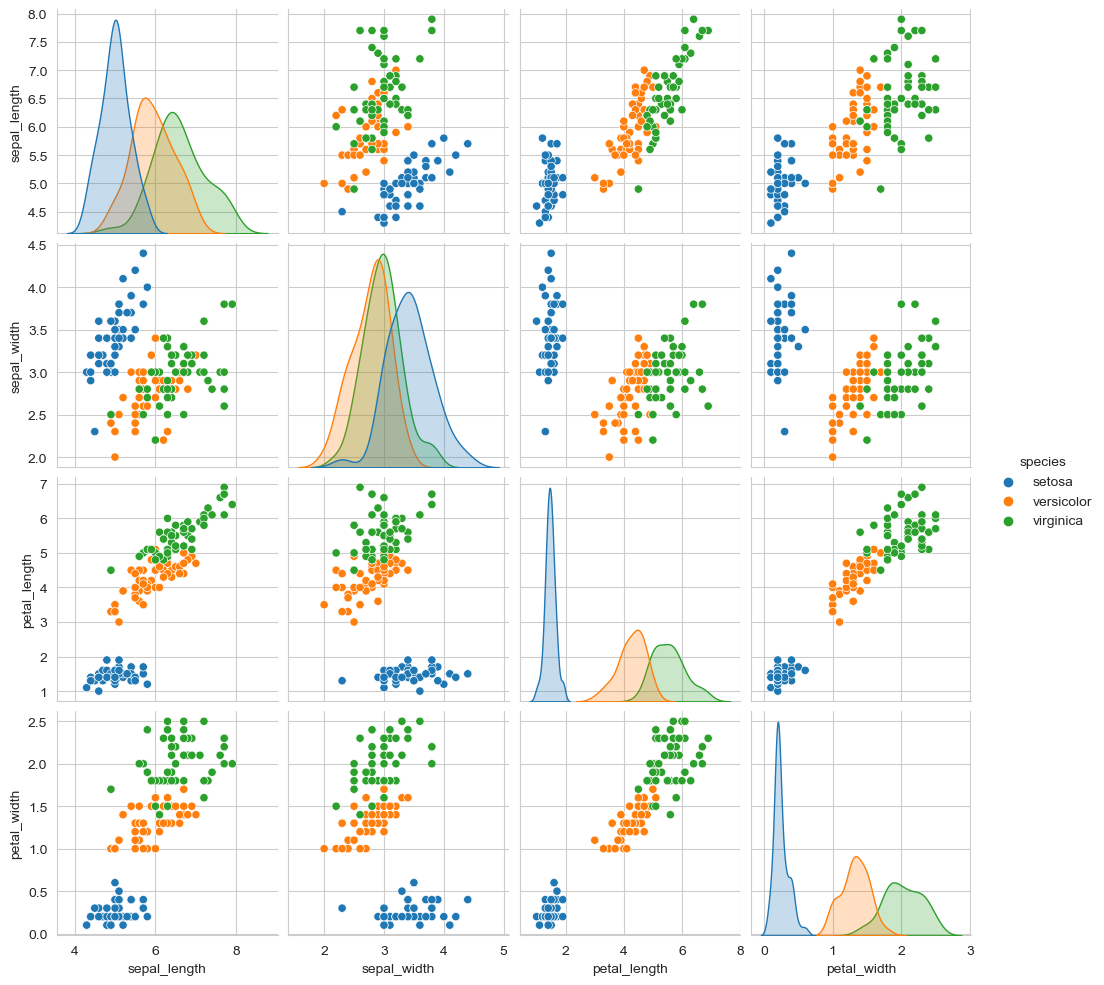

In [26]:
# Scatterplot
sns.pairplot(data=df_iris, hue="species") # feature correlation 
plt.show()

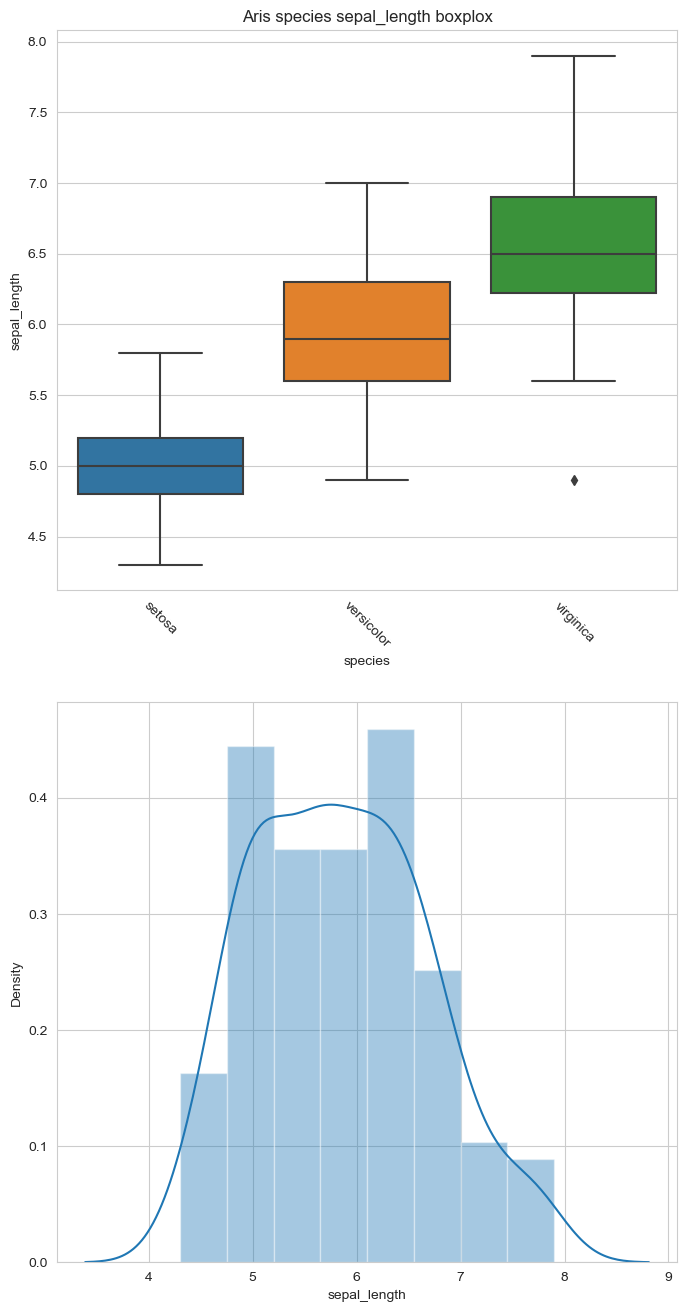

In [27]:
# multiple charts and chart overlap
# stateful

fig=plt.figure(figsize=(8,16)) # X: control width, Y: control length
plt.subplot(2,1,1) # or ax0=fig.add_subplot(2,1,1)
sns.boxplot(x='species',y='sepal_length',data=df_iris)
plt.xticks(rotation=-45) # adjust xticks
plt.title('Aris species sepal_length boxplox') # add title

plt.subplot(2,1,2)
sns.distplot(df_iris['sepal_length'])

plt.show()

In [28]:
# How to make factorplot: two factors
file_id='1pJJp1TrBGuMEVqQWynWGADzd32tkGMGz' #Changed
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
df_factor = pd.read_csv(csv_url)
df_factor=df_factor.iloc[:,[1,2,3,4,5]]
df_factor.head()

id     diet  pulse    time  kind
0   1  low fat     85   1 min  rest
1   1  low fat     85  15 min  rest
2   1  low fat     88  30 min  rest
3   2  low fat     90   1 min  rest
4   2  low fat     92  15 min  rest

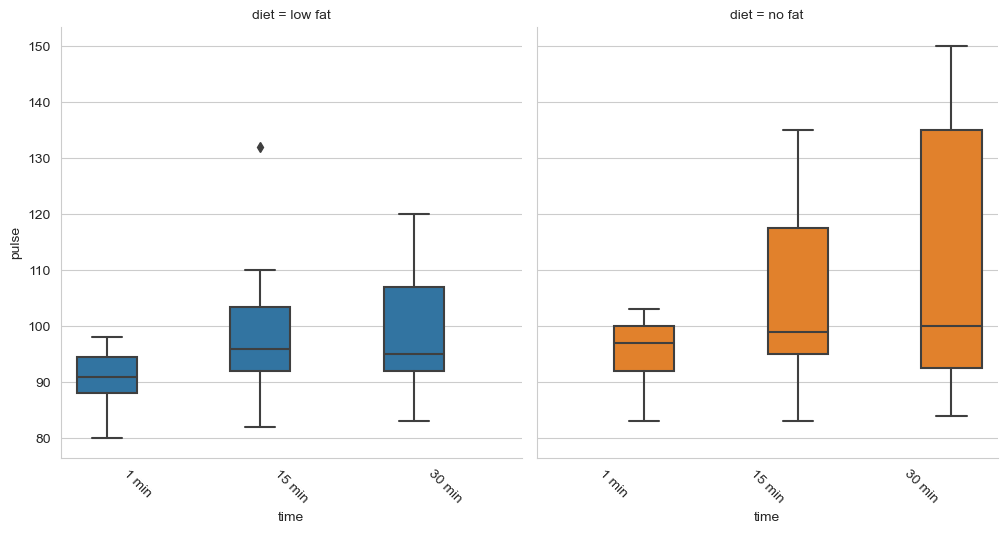

In [29]:
# g is a sns object
g=sns.factorplot(x='time', 
                   y='pulse', 
                   data=df_factor, 
                   hue='diet',  # Color by diet
                   col='diet',  # Separate by diet
                   kind='box') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
plt.show()

In [30]:
# regression plot
# Simulate data:
x = np.linspace(1,50,num=100)
epsilon = np.random.normal(0,3,size=100)
dt_lin = pd.DataFrame({'x':x, 'y':0.2+0.2*x + epsilon})


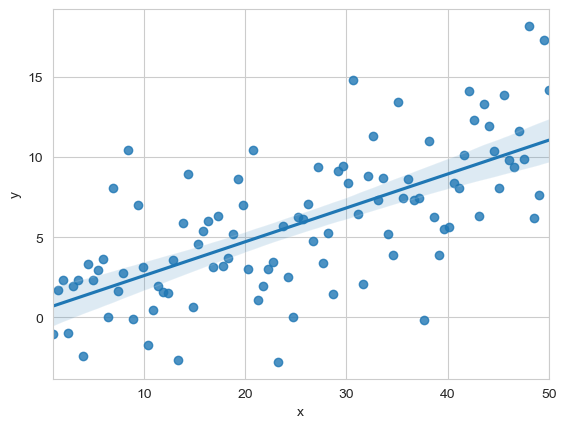

In [31]:
sns.set_style('whitegrid')
sns.regplot(x='x',y='y',data=dt_lin)

plt.show()

## 2.1 Modify in Seaborn

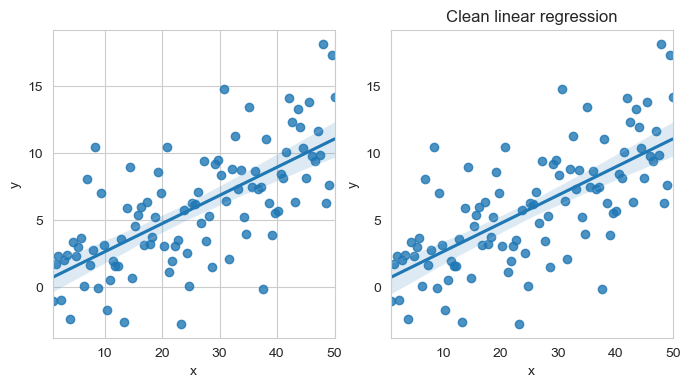

In [32]:
# 微调， 把图形做得更简洁, 把不喜欢的gridline去掉, 加上title
fig=plt.figure(figsize=(8,4))
ax0=fig.add_subplot(121)
sns.regplot(x='x',y='y',data=dt_lin,ax=ax0)

ax1=fig.add_subplot(122)
sns.regplot(x='x',y='y',data=dt_lin,ax=ax1)
ax1.grid(False)
ax1.set_title('Clean linear regression')

plt.show()

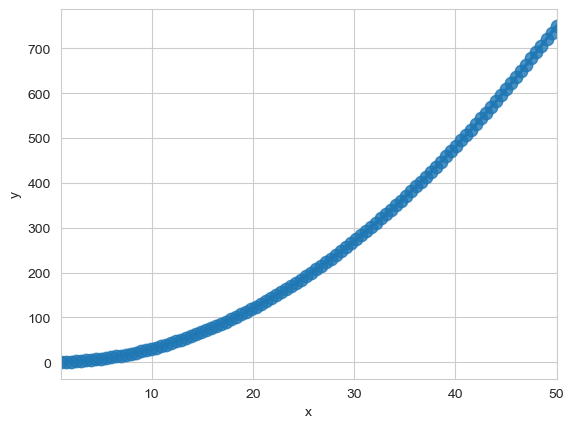

In [33]:
# seaborn fit a polynomial model
x = np.linspace(1,50, num = 100)
dt_poly=pd.DataFrame({'x':x,'y':0.2+0.3*np.power(x,2)})
sns.regplot(x='x', y='y',data=dt_poly,order=2, ci=None, scatter_kws={"s": 80});
plt.show()

## 2.2 7 days moving average of duration

In [34]:
# Another example
file_id='1zksQPPhTzQYjFXglr_zFMAMIpzQGWcOG' #Changed
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
df_network = pd.read_csv(csv_url)
df_network.head()

index            date  duration  item    month   network network_type
0      0  15/10/14 06:58    34.429  data  2014-11      data         data
1      1  15/10/14 06:58    13.000  call  2014-11  Vodafone       mobile
2      2  15/10/14 14:46    23.000  call  2014-11    Meteor       mobile
3      3  15/10/14 14:48     4.000  call  2014-11     Tesco       mobile
4      4  15/10/14 17:27     4.000  call  2014-11     Tesco       mobile

In [35]:
df_network['date'] = pd.to_datetime(df_network['date'],format="%d/%m/%y %H:%M")
df_network['date'] = df_network['date'].dt.date
df_network['date'] = pd.to_datetime(df_network['date'],format="%Y-%m-%d")
df_network_agg = df_network.query("item in ('data','call')").groupby(['date','network','item'])['duration'].mean().reset_index()


In [36]:
# 7 days moving average of duration
df_network_agg = df_network_agg.sort_values(by=['date','network','item'],ascending=['True','True','True'])
df_network_agg_mavg_temp = df_network_agg.groupby(['network','item'])['duration'].transform(lambda x:x.rolling(7,1).mean().round(0))
df_network_agg_mavg_temp = pd.merge(df_network_agg,df_network_agg_mavg_temp,how='inner',left_index=True,
                                    right_index=True,suffixes=['','_7davg'])
df_network_agg_mavg_temp.fillna(0,inplace=True)

In [37]:
df_network_agg_mavg_temp.head()

date   network  item  duration  duration_7davg
0 2014-10-15    Meteor  call    23.000            23.0
1 2014-10-15     Tesco  call     4.000             4.0
2 2014-10-15  Vodafone  call    13.000            13.0
3 2014-10-15      data  data    34.429            34.0
4 2014-10-16     Three  call   945.000           945.0

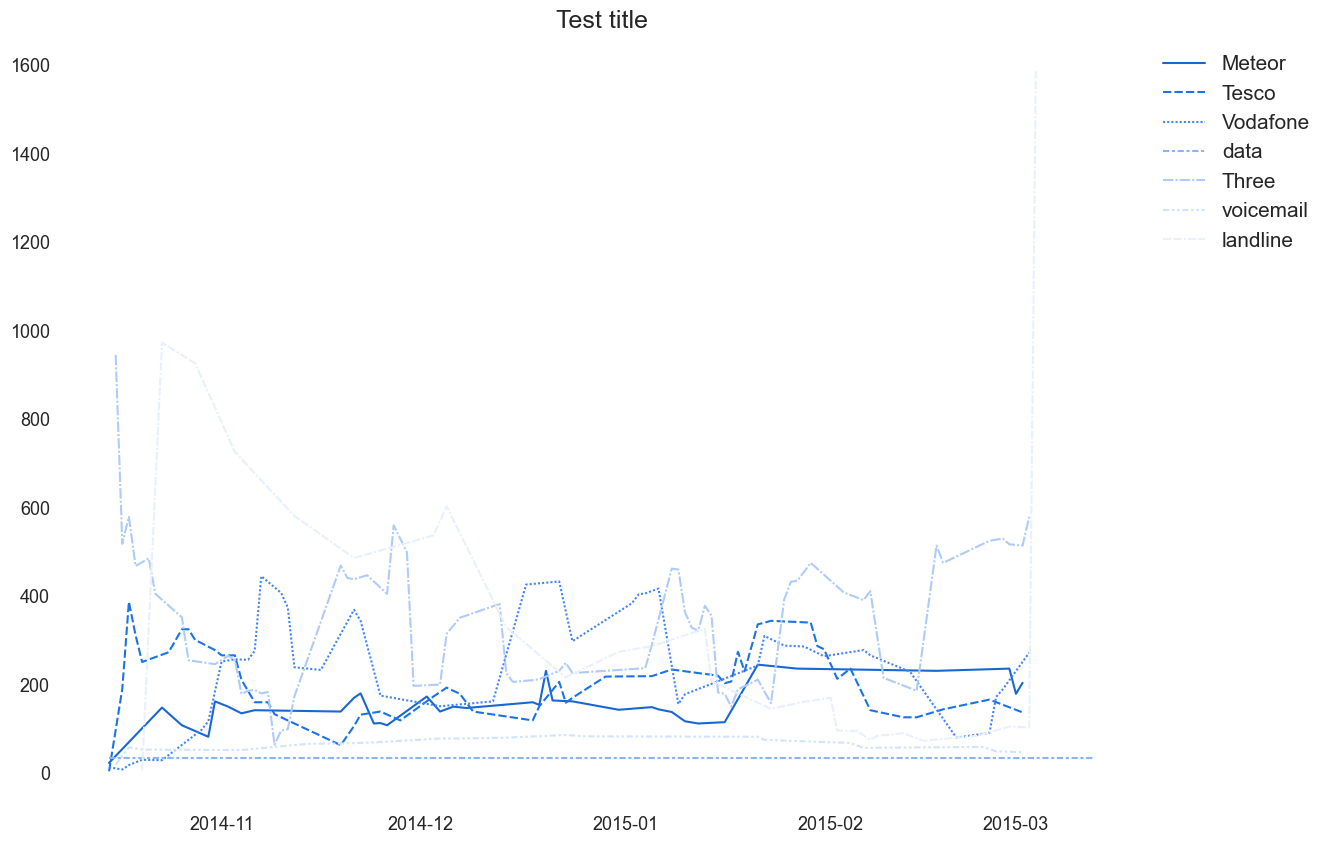

In [38]:
# plot a linechart, using seaborn, specify the hue and hue_order, line_style
network_order = df_network_agg_mavg_temp.query("date=='2014-11-01'").sort_values(by=['duration_7davg'])['network'].tolist()
network_order = df_network_agg_mavg_temp['network'].unique().tolist()


# specify colors, using palette
color_shaded_blue=['#1967D2','#1A73E8','#4285F4','#8AB4F8','#AECBFA','#D2E3FC','#E8F0FE'] # 蓝色由深到浅

fig,ax0 = plt.subplots(1,1,figsize=(14,10))

sns.lineplot(x='date',y='duration_7davg',hue='network',hue_order=network_order,
             style='network',
             style_order=network_order,
             palette=color_shaded_blue,
             data=df_network_agg_mavg_temp,ax=ax0,ci=False)
ax0.grid(False)
ax0.legend(loc=2,bbox_to_anchor=(1,1),prop={'size':15},frameon=False)
ax0.set_xlabel('')
ax0.set_ylabel('',fontsize=16)
ax0.set_title('Test title', fontdict={'fontsize':18,'fontweight':'medium'})
for label in (ax0.get_xticklabels()+ax0.get_yticklabels()):
    label.set_fontsize(13)
sns.despine() # remove top and right spines
ax0.spines['left'].set_visible(False) # remove left spine
ax0.spines['bottom'].set_visible(False) # remove right spine
plt.show()

# Part 3 Plotly Package

## 3.1 Interactive Visualizations (sankey chart/scatter plot/piechatr)

In [39]:
!pip install chart_studio
!pip install plotly --upgrade

import plotly
import chart_studio.plotly as py


In [40]:
# Use British Bank data as example: 
dt_region_job_nums = df.groupby(['region','job'])['cust_id'].count().reset_index()
nodes=list(set(dt_region_job_nums['region'].values.tolist() + dt_region_job_nums['job'].values.tolist()))
dt_region_job_nums['indice_region'] = dt_region_job_nums['region'].apply(lambda x: nodes.index(x))
dt_region_job_nums['indice_job'] = dt_region_job_nums['job'].apply(lambda x: nodes.index(x))

In [41]:
dt_region_job_nums.head()

region           job  cust_id  indice_region  indice_job
0           England   Blue Collar      344              6           4
1           England         Other      314              6           5
2           England  White Collar     1501              6           0
3  Northern Ireland   Blue Collar       41              2           4
4  Northern Ireland         Other      105              2           5

In [42]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = nodes,
      color = "blue"
    ),
    link = dict(
      source = dt_region_job_nums['indice_region'], # indices correspond to labels
      target = dt_region_job_nums['indice_job'], # indices correspond to labels
      value = dt_region_job_nums['cust_id']
  ))])

fig.update_layout(title_text="Customer region and job sankey chart", font_size=10)
fig.show()

# more details of Sankey chart: https://plotly.com/python/sankey-diagram/

In [43]:
# Plotly express
import plotly.express as px
my_template = 'plotly_dark'

df = px.data.gapminder()
df_2007 = df.query("year==2007")
fig = px.scatter(df_2007, x="gdpPercap", y="lifeExp", 
                 size = 'pop', 
                 hover_data=['country'], # df_2007.columns
                 color="continent",
                 title=f"""Life exp in '{my_template}'""", 
                 log_x=True,size_max=60)
fig.update_layout(xaxis={"title":'gdpPercap',
                         "title_font":dict(size=15)},
                  yaxis={"title":'lifeExp',
                         "title_font":dict(size=15)
                  },
                  title_font_color='white',
                  title_x=0.5,
                  template=my_template 
                  )

fig.show()

In [44]:
df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'])
fig.update_layout(template=my_template)
fig.show()

## Part 4 Global Sales Data Follow-up

In [45]:
sales_file_id='1TMMC5AyFe3hAT4Oxn0tRGhP_tt_z9IP4' #Changed
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
sales_csv_url=link.format(FILE_ID=sales_file_id)
df_sales = pd.read_csv(sales_csv_url,encoding='latin-1')

In [46]:
df_sales.head()

order_date       ship_mode      segment         city            state  \
0   1/1/2012    Second Class  Home Office    Stockholm        Stockholm   
1   1/1/2012  Standard Class     Consumer  Wagga Wagga  New South Wales   
2   1/1/2012    Second Class     Consumer     Budapest         Budapest   
3   1/1/2012  Standard Class     Consumer  Wagga Wagga  New South Wales   
4   1/1/2012  Standard Class     Consumer  Wagga Wagga  New South Wales   

     country           region        market   product_id         category  \
0     Sweden  Northern Europe        Europe  OFF-PA-4177  Office Supplies   
1  Australia          Oceania  Asia Pacific  OFF-PA-3990  Office Supplies   
2    Hungary   Eastern Europe        Europe  OFF-ST-6230  Office Supplies   
3  Australia          Oceania  Asia Pacific  FUR-FU-4075        Furniture   
4  Australia          Oceania  Asia Pacific  OFF-SU-3002  Office Supplies   

  sub_category                             product_name     sales  quantity  \
0        Paper              Enermax Note Cards, Premium   $44.87          3   
1        Paper  Eaton Computer Printout Paper, 8.5 x 11   $55.24          2   
2      Storage                  Tenex Box, Single Width   $66.12          4   
3  Furnishings               Eldon Light Bulb, Duo Pack  $113.67          5   
4     Supplies                 Acme Trimmer, High Speed  $120.37          3   

   discount  profit  shipping_cost order_priority  
0       0.5  -26.06           4.82           High  
1       0.1   15.34           1.80         Medium  
2       0.0   29.64           8.17           High  
3       0.1   37.77           4.70         Medium  
4       0.1   36.04           9.72         Medium

In [47]:
'''
Data preprocessing
- Remove dollar sign, comma from the sales and profit
- convert sales,profit field value type from string to float

'''
df_sales.sales = df_sales.sales.str.replace('$','')
df_sales.sales = df_sales.sales.str.replace(',','')
df_sales.sales = df_sales.sales.str.replace(' Rectangular"','0')


df_sales.sales = df_sales.sales.astype(float)
df_sales.profit = df_sales.profit.str.replace(',','')
df_sales.profit = df_sales.profit.astype(float)

In [48]:
df_sales.head(3)

order_date       ship_mode      segment         city            state  \
0   1/1/2012    Second Class  Home Office    Stockholm        Stockholm   
1   1/1/2012  Standard Class     Consumer  Wagga Wagga  New South Wales   
2   1/1/2012    Second Class     Consumer     Budapest         Budapest   

     country           region        market   product_id         category  \
0     Sweden  Northern Europe        Europe  OFF-PA-4177  Office Supplies   
1  Australia          Oceania  Asia Pacific  OFF-PA-3990  Office Supplies   
2    Hungary   Eastern Europe        Europe  OFF-ST-6230  Office Supplies   

  sub_category                             product_name  sales  quantity  \
0        Paper              Enermax Note Cards, Premium  44.87         3   
1        Paper  Eaton Computer Printout Paper, 8.5 x 11  55.24         2   
2      Storage                  Tenex Box, Single Width  66.12         4   

   discount  profit  shipping_cost order_priority  
0       0.5  -26.06           4.82           High  
1       0.1   15.34           1.80         Medium  
2       0.0   29.64           8.17           High

In [49]:
# Problem: why Central US has stats sig lower profit rate than other regions
df_sales_us_agg=df_sales.loc[df_sales.country=='United States',].groupby(['region'])['sales','profit'].sum().reset_index()
df_sales_us_agg['profit_rate']=df_sales_us_agg.profit/df_sales_us_agg.sales
df_sales_us_agg

region      sales     profit  profit_rate
0   Central US  501109.58   39649.13     0.079123
1   Eastern US  677790.76   91498.51     0.134995
2  Southern US  391635.90   46719.45     0.119293
3   Western US  725219.45  108322.99     0.149366

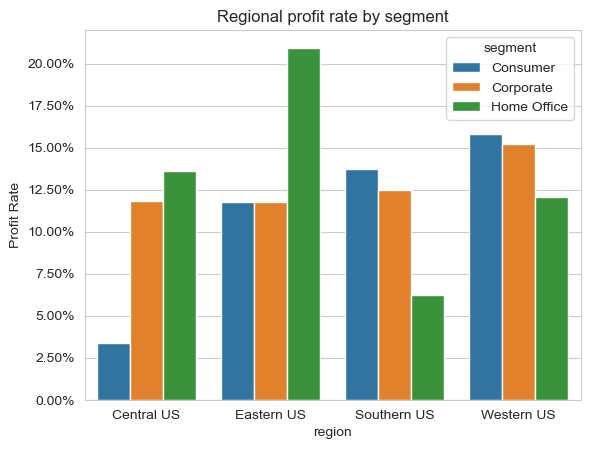

In [50]:
# Next question: deep-dive why central US has lowest profit rate using visualization
'''
breakout and viz p_rate by segment, category
findings: consumer segment profit rate in central US is much lower than other.  
'''
df_us=df_sales.loc[df_sales.country=='United States',]
df_us_region=df_us.groupby(['region','segment'])['sales','profit'].sum().reset_index()
df_us_region['profit_rate']=df_us_region['profit']/df_us_region['sales']

g_region=sns.barplot(x='region',y='profit_rate',hue='segment',ci=None, data=df_us_region)
g_region.set_title('Regional profit rate by segment')
g_region.set_ylabel('Profit Rate')
vals=g_region.get_yticks()
g_region.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]) # if you want to show percentage for yticklabels
plt.show()



In [51]:
'''
within the Consumer segment, central vs the other 3
1. category
'''
# two groups: central vs other
df_us_segment=df_us.loc[df_sales.segment=='Consumer',]

In [52]:
df_us_segment['region_label']=df_us_segment['region'].apply(lambda x:'Central US' if x=='Central US' else 'Other Region')
df_us_segment_agg=df_us_segment.groupby(['region_label','category'])['sales','profit'].sum().reset_index()
df_us_segment_agg['profit_rate']=df_us_segment_agg['profit']/df_us_segment_agg['sales']
df_us_segment_agg


region_label         category      sales    profit  profit_rate
0    Central US        Furniture   86217.59  -3989.79    -0.046276
1    Central US  Office Supplies   93002.45   2524.37     0.027143
2    Central US       Technology   72690.75   9975.41     0.137231
3  Other Region        Furniture  304515.54  10868.46     0.035691
4  Other Region  Office Supplies  270702.24  53685.67     0.198320
5  Other Region       Technology  333025.21  60936.70     0.182979

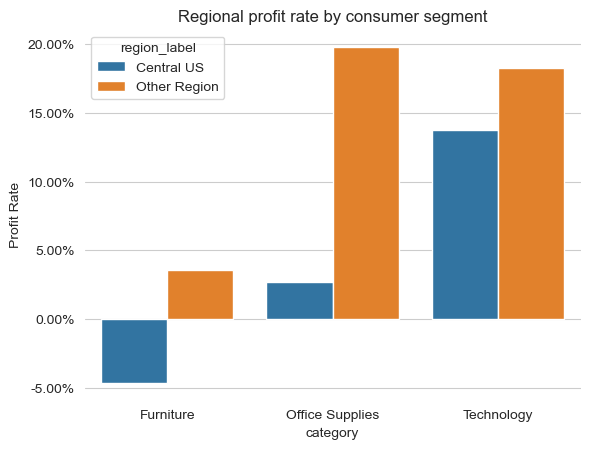

In [53]:
fig=plt.figure() # crate a new figure
ax0=fig.add_subplot(111)
g_region1=sns.barplot(x='category',y='profit_rate',hue='region_label',ci=None, data=df_us_segment_agg,ax=ax0)
g_region1.set_title('Regional profit rate by consumer segment')
g_region1.set_ylabel('Profit Rate')
vals=g_region1.get_yticks()
g_region1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]) # if you want to show percentage for yticklabels
sns.despine(ax=ax0,left=True,bottom=True) # remove the left and bottom frame 
plt.show()
